# Jonathan Halverson
# Monday, July 31, 2017
# Chapter 4: Regression and Prediction

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('halverson')

In [39]:
df = pd.read_csv('../machine_learning/Advertising.csv', header=0)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [40]:
df = df.drop([df.columns[0]], axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [41]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [42]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


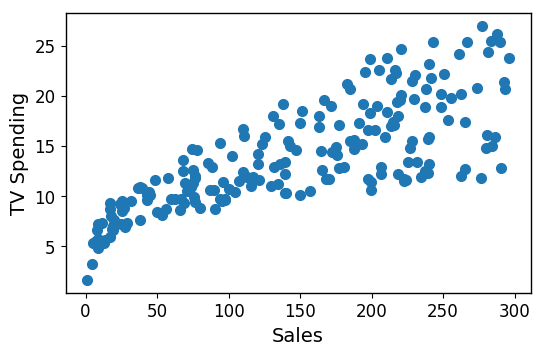

In [43]:
plt.scatter(df.TV, df.Sales)
plt.xlabel('Sales')
plt.ylabel('TV Spending')

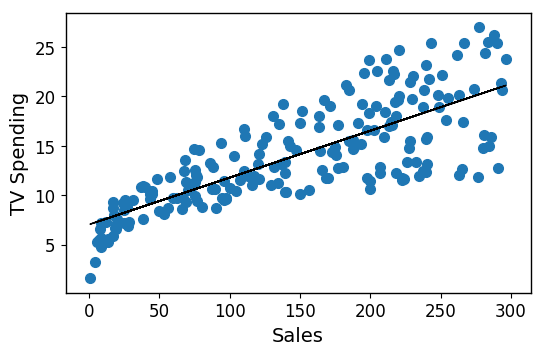

In [44]:
a, b = np.polyfit(df.TV, df.Sales, 1)
plt.plot(df.TV, a * df.TV + b, 'k-')
plt.scatter(df.TV, df.Sales)
plt.xlabel('Sales')
plt.ylabel('TV Spending')

In [45]:
a, b

(0.04753664043301975, 7.0325935491276992)

In [46]:
import statsmodels.api as sm
X = sm.add_constant(df.TV)
regmodel = sm.OLS(df.Sales, X, missing='none')
result = regmodel.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 31 Jul 2017   Prob (F-statistic):           1.47e-42
Time:                        17:04:06   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

(array([  4.,  10.,  13.,  17.,  40.,  42.,  33.,  16.,  17.,   8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <a list of 10 Patch objects>)

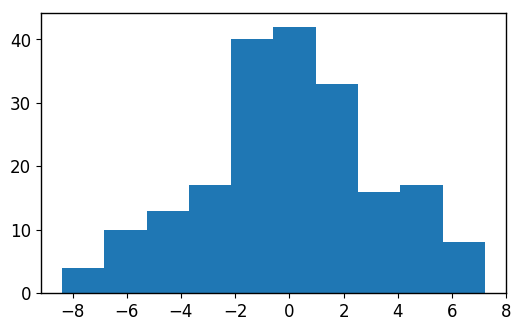

In [47]:
plt.hist(result.resid)

In [51]:
from scipy.stats import anderson

a2, crit, sig = anderson(result.resid, 'norm')
a2, crit, sig, a2 < crit[4]

(0.49121060466279687,
 array([ 0.565,  0.644,  0.772,  0.901,  1.071]),
 array([ 15. ,  10. ,   5. ,   2.5,   1. ]),
 True)

The Anderson-Darling test suggests that the data may very well indeed be normally distributed.

In [49]:
for xval, res in zip(df.TV, result.resid):
     plt.plot([xval, xval], [res]

SyntaxError: invalid syntax (<ipython-input-49-4dff4f765df4>, line 2)

In [ ]:
plt.scatter(df.Radio, df.Sales)
plt.xlabel('Sales')
plt.ylabel('Radio Spending')

In [ ]:
plt.scatter(df.Newspaper, df.Sales)
plt.xlabel('Sales')
plt.ylabel('Newspaper Spending')